In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import statistics
import numpy as np
from csv import writer 
import math

In [2]:
training_data = pd.read_csv("data/train.csv")
training_data["full_text_lower"] = training_data["full_text"].astype(str).str.lower()

In [3]:
training_data.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,full_text_lower
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,i think that students would benefit from learn...
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,when a problem is a change you have to let it ...
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"dear, principal\n\nif u change the school poli..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,the best time in life is when you become yours...
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,small act of kindness can impact in other peop...


In [37]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text_id          3911 non-null   object 
 1   full_text        3911 non-null   object 
 2   cohesion         3911 non-null   float64
 3   syntax           3911 non-null   float64
 4   vocabulary       3911 non-null   float64
 5   phraseology      3911 non-null   float64
 6   grammar          3911 non-null   float64
 7   conventions      3911 non-null   float64
 8   full_text_lower  3911 non-null   object 
dtypes: float64(6), object(3)
memory usage: 275.1+ KB


# Exploratory Data Analysis and Preliminary Feature Engineering

In [13]:
num_essays = len(training_data)
num_essays

3911

array([[<AxesSubplot:title={'center':'cohesion'}>,
        <AxesSubplot:title={'center':'syntax'}>],
       [<AxesSubplot:title={'center':'vocabulary'}>,
        <AxesSubplot:title={'center':'phraseology'}>],
       [<AxesSubplot:title={'center':'grammar'}>,
        <AxesSubplot:title={'center':'conventions'}>]], dtype=object)

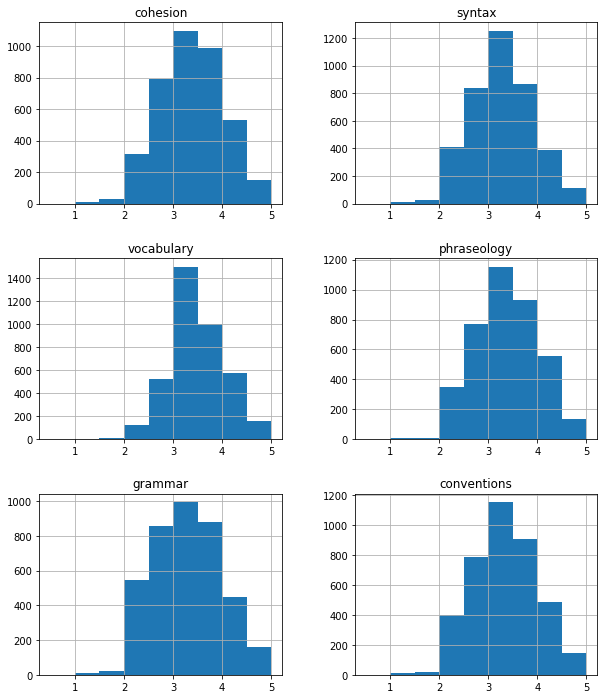

In [29]:
training_data.hist(list(training_data.columns)[2:8], bins = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], figsize=(10,12))

In [43]:
# Idea - people with better vocabulary are probably using a larger percentage of the words in the entire corpus.

# Split up the text into words
regexp = RegexpTokenizer('\w+')
training_data['text_token'] = training_data['full_text_lower'].apply(regexp.tokenize)

# Since we're evaluating vocabulary, remove words that are less important like "the", "and"
stopwords = nltk.corpus.stopwords.words("english")

training_data['text_token'] = training_data['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
training_data.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,full_text_lower,text_token
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,i think that students would benefit from learn...,"[think, students, would, benefit, learning, ho..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,when a problem is a change you have to let it ...,"[problem, change, let, best, matter, happening..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"dear, principal\n\nif u change the school poli...","[dear, principal, u, change, school, policy, g..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,the best time in life is when you become yours...,"[best, time, life, become, agree, greatest, ac..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,small act of kindness can impact in other peop...,"[small, act, kindness, impact, people, change,..."


In [52]:
# Next we want to construct a list of all the unique words.
# We won't try to deal with spelling errors for now. 
all_training_words = []
for words in training_data["text_token"]:
    all_training_words.extend(words)
all_training_words = list(set(all_training_words))
num_unique_words = len(all_training_words)
print("The number of unique words in the training data is:", num_unique_words)

The number of unique words in the training data is: 21249


In [64]:
# Basic vocab score - percentage of words used from the training corpus
training_data["basic_vocab_score"] = [len(set(x))/num_unique_words for x in training_data["text_token"]]
training_data.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,full_text_lower,text_token,basic_vocab_score,avg_word_length
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,i think that students would benefit from learn...,"[think, students, would, benefit, learning, ho...",0.004047,5.201550
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,when a problem is a change you have to let it ...,"[problem, change, let, best, matter, happening...",0.003859,5.532710
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"dear, principal\n\nif u change the school poli...","[dear, principal, u, change, school, policy, g...",0.002824,5.318182
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,the best time in life is when you become yours...,"[best, time, life, become, agree, greatest, ac...",0.006400,5.664286
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,small act of kindness can impact in other peop...,"[small, act, kindness, impact, people, change,...",0.003247,5.437500


In [65]:
# Idea - using more long words could indicate a better vocabulary - average length of word score 
training_data["avg_word_length"] = [statistics.mean(list(map(len, x))) for x in training_data["text_token"]]
training_data.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,full_text_lower,text_token,basic_vocab_score,avg_word_length
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,i think that students would benefit from learn...,"[think, students, would, benefit, learning, ho...",0.004047,5.201550
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,when a problem is a change you have to let it ...,"[problem, change, let, best, matter, happening...",0.003859,5.532710
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"dear, principal\n\nif u change the school poli...","[dear, principal, u, change, school, policy, g...",0.002824,5.318182
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,the best time in life is when you become yours...,"[best, time, life, become, agree, greatest, ac...",0.006400,5.664286
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,small act of kindness can impact in other peop...,"[small, act, kindness, impact, people, change,...",0.003247,5.437500


In [66]:
training_data.corr()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions,basic_vocab_score,avg_word_length
cohesion,1.000000,0.695459,0.666151,0.690058,0.638689,0.666151,0.302985,0.226857
syntax,0.695459,1.000000,0.680562,0.725467,0.709525,0.700025,0.271065,0.212572
vocabulary,0.666151,0.680562,1.000000,0.735261,0.654852,0.664292,0.386040,0.251925
phraseology,0.690058,0.725467,0.735261,1.000000,0.719746,0.666842,0.327380,0.172395
grammar,0.638689,0.709525,0.654852,0.719746,1.000000,0.673301,0.185249,0.137729
conventions,0.666151,0.700025,0.664292,0.666842,0.673301,1.000000,0.195389,0.225499
basic_vocab_score,0.302985,0.271065,0.386040,0.327380,0.185249,0.195389,1.000000,0.087223
avg_word_length,0.226857,0.212572,0.251925,0.172395,0.137729,0.225499,0.087223,1.000000


<AxesSubplot:xlabel='basic_vocab_score', ylabel='vocabulary_score'>

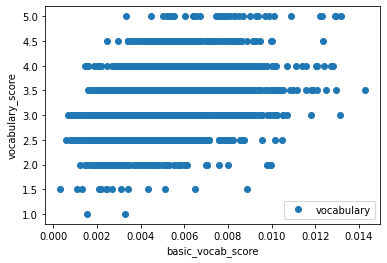

In [73]:
training_data.plot(x='basic_vocab_score', y='vocabulary', style='o', ylabel = "vocabulary_score")

<AxesSubplot:xlabel='avg_word_length', ylabel='vocabulary score'>

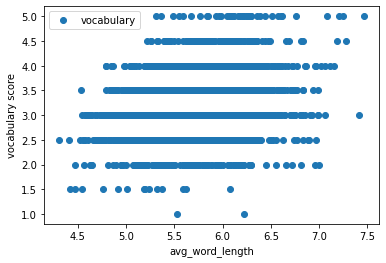

In [71]:
training_data.plot(x='avg_word_length', y='vocabulary', style='o', ylabel = "vocabulary score")

# Outliers

In [22]:
# Consider very high spread, very low spread
training_data["spread"] = training_data.iloc[:,2:8].apply(lambda x: max(x) - min(x), axis = 1)
training_data["spread"]
max_spread = max(training_data["spread"])
spread_outliers = training_data[training_data["spread"] == max_spread]
num_spread_outliers = len(spread_outliers)
spread_outliers

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,full_text_lower,max_spread,spread
582,2C38B62420C3,Dear TEACHER_NAME\n\nI think that we don't nee...,3.0,3.5,3.0,3.0,5.0,3.5,dear teacher_name\n\ni think that we don't nee...,2.0,2.0
722,37D67E614E05,Dear TEACHER_NAME\n\nI do think students shoul...,2.0,3.0,3.0,3.0,3.0,4.0,dear teacher_name\n\ni do think students shoul...,2.0,2.0
784,3CDD56FF3477,"Today, at school, most people are required by ...",5.0,3.5,4.0,3.5,3.0,4.0,"today, at school, most people are required by ...",2.0,2.0
1832,8A216BEDA4C2,"I would want to go to France, Generic_City i w...",2.5,2.0,4.0,3.0,3.0,3.0,"i would want to go to france, generic_city i w...",2.0,2.0
1947,92F7DD653EFB,Some people think that is more beneficial work...,4.0,3.0,3.5,2.0,3.0,3.0,some people think that is more beneficial work...,2.0,2.0
2556,BE1752DCF09C,Some students take online classes they think i...,3.0,2.0,3.0,3.0,2.5,4.0,some students take online classes they think i...,2.0,2.0
3262,E2F767441B44,If in high school should young students be cap...,5.0,4.0,4.0,4.0,3.0,4.0,if in high school should young students be cap...,2.0,2.0
3446,EC35456D4E07,"Conserve energy and resources,some businesses ...",2.0,2.0,2.5,2.5,4.0,2.5,"conserve energy and resources,some businesses ...",2.0,2.0
3457,ECC9E84CD3D1,I think that students should start an after sc...,3.0,3.0,3.0,2.0,4.0,3.5,i think that students should start an after sc...,2.0,2.0
3597,F2BAC6095D8A,I belive that students would work more effecti...,3.0,3.5,3.0,3.0,4.0,2.0,i belive that students would work more effecti...,2.0,2.0


# BERT Encoder

In [4]:
## We'll import transformers, the package that has the BERT models
## as ppb
import transformers as ppb

## We'll also import pytorch
import torch

In [5]:
## This code gets us the pre-trained DistilBERT model
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

In [6]:
## This loads the pretrained tokenizer and model
## it can take a while!
tokenizer = tokenizer_class.from_pretrained(pretrained_weights, truncation = True, padding = True)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
training_data.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,full_text_lower
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,i think that students would benefit from learn...
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,when a problem is a change you have to let it ...
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"dear, principal\n\nif u change the school poli..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,the best time in life is when you become yours...
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,small act of kindness can impact in other peop...


# BERT Encode Training Data in Batches

In [71]:
num_input_ids = len(training_data)
batch_size = 100
num_batches = int(num_input_ids/batch_size)

with open('data/BertEncoding.csv', 'a', newline='') as f_object:  
    for i in range(num_batches):
        print("Batch range is: ", i * batch_size, min((i+1)*batch_size, num_input_ids))
        tokenizer_output = tokenizer(list(training_data['full_text_lower'])[i * batch_size:min((i+1)*batch_size, num_input_ids)], add_special_tokens=True, 
                                                           truncation = True, padding = True, return_attention_mask = True, return_tensors = "pt")
        input_ids = tokenizer_output['input_ids']
        attention_mask = tokenizer_output["attention_mask"]
        with torch.no_grad(): 
                last_hidden_states = model(input_ids, attention_mask=attention_mask)
                np.savetxt(f_object,last_hidden_states[0][:,0,:].numpy(),delimiter=',',fmt='%f')
                

Batch range is:  0 100
Batch range is:  100 200
Batch range is:  200 300
Batch range is:  300 400
Batch range is:  400 500
Batch range is:  500 600
Batch range is:  600 700
Batch range is:  700 800
Batch range is:  800 900
Batch range is:  900 1000
Batch range is:  1000 1100
Batch range is:  1100 1200
Batch range is:  1200 1300
Batch range is:  1300 1400
Batch range is:  1400 1500
Batch range is:  1500 1600
Batch range is:  1600 1700
Batch range is:  1700 1800
Batch range is:  1800 1900
Batch range is:  1900 2000
Batch range is:  2000 2100
Batch range is:  2100 2200
Batch range is:  2200 2300
Batch range is:  2300 2400
Batch range is:  2400 2500
Batch range is:  2500 2600
Batch range is:  2600 2700
Batch range is:  2700 2800
Batch range is:  2800 2900
Batch range is:  2900 3000
Batch range is:  3000 3100
Batch range is:  3100 3200
Batch range is:  3200 3300
Batch range is:  3300 3400
Batch range is:  3400 3500
Batch range is:  3500 3600
Batch range is:  3600 3700
Batch range is:  3700 

# Read in BERT Encoded Data

In [79]:
bert_encoded_training_data = pd.read_csv("data/BertEncoding.csv", header = None)
bert_encoded_training_data

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.029591,-0.097132,0.059457,0.165369,-0.056738,-0.304551,0.515720,0.490612,-0.259699,-0.598605,...,0.066784,-0.430935,0.219690,-0.090140,-0.182325,0.140874,-0.110938,-0.213190,0.248386,0.328340
1,-0.038584,-0.015137,-0.123268,-0.022665,-0.237719,-0.207562,0.261755,0.556195,-0.502778,-0.549189,...,0.072002,-0.536795,0.007473,-0.350114,0.060332,0.283561,-0.073081,-0.103171,0.421613,0.159889
2,-0.093898,-0.037068,0.011076,0.117620,-0.088856,-0.276792,0.289310,0.567711,-0.187136,-0.502904,...,-0.058506,-0.371836,0.030353,-0.167207,-0.139666,0.025361,-0.151827,0.029557,0.457311,0.377178
3,-0.026837,-0.039115,-0.332211,0.052445,-0.045733,-0.139317,0.489169,0.506403,-0.240078,-0.580906,...,0.075844,-0.448586,0.129452,-0.101856,-0.063095,0.279719,0.021416,-0.069962,0.459376,0.225718
4,-0.168148,-0.171669,-0.141218,0.015397,0.029418,-0.196916,0.209078,0.774049,-0.660054,-0.423037,...,-0.067982,-0.448247,0.147778,-0.097391,-0.305021,0.237657,0.033307,-0.382741,0.414850,0.033029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,0.219675,0.073528,-0.237438,-0.009554,-0.116485,-0.287817,0.358889,0.567810,-0.094812,-0.281783,...,-0.103016,-0.231311,0.055898,-0.291534,0.222228,0.007023,-0.094847,-0.147935,0.449684,0.255473
3907,-0.136682,0.046676,-0.092843,0.170535,-0.069056,-0.284096,0.255674,0.412818,-0.314843,-0.561639,...,-0.007266,-0.482178,0.116537,-0.084594,-0.154657,0.064647,-0.160637,-0.216604,0.309719,0.234979
3908,-0.042635,0.034022,-0.083136,-0.123123,-0.340256,-0.151419,0.379553,0.277510,-0.033309,-0.415299,...,0.023153,-0.283158,-0.043056,-0.172749,0.036886,0.129780,-0.073406,0.082496,0.447110,0.407554
3909,-0.093317,-0.038759,-0.537204,0.083392,-0.229918,-0.071670,0.325250,0.507643,-0.404548,-0.519141,...,0.020531,-0.378594,-0.003675,-0.081887,0.060458,0.240452,-0.063774,-0.099364,0.352795,0.214748
